## 《Python程序设计》2023秋季
**<font size=4>6 Python函数编程</font>**

**机械科学与工程学院  刘潇**

本节要点包括：
- 掌握匿名函数的定义和使用
- 掌握映射、过滤、规约等典型函数的使用
- 理解过程编程与函数编程的区别

### 面向函数编程

In [8]:
# 棋盘游戏

def createpoint(startposition): # 落子
    pos = startposition
    def go(direction, step): # 走子
        new_x = pos[0] + direction[0]*step
        new_y = pos[1] + direction[1]*step
        pos[0] = new_x
        pos[1] = new_y
        return pos
    return go

point1 = createpoint([0,0]) # 落第一个棋子
print(point1([10,0], 1))
point2 = createpoint([10,10]) # 落第二个棋子
print(point2([5, 0], 1))
print(point1([0,10], 1))
print(point2([0, 5], 1))
print(point1([-1,0], 5))

[10, 0]
[15, 10]
[10, 10]
[15, 15]
[5, 10]


In [9]:
print(point1, point2)

<function createpoint.<locals>.go at 0x00000248AA9C1310> <function createpoint.<locals>.go at 0x00000248AA9C1550>


In [6]:
def func1(x, y):
    return abs(x)+abs(y)
print(func1(-5, -3))

8


In [7]:
def func1(x, y, f):
    return f(x)+f(y)
print(func1(-5, -3, abs))
print(func1(-5.2, -3.6, round))

8
-9


In [5]:
print(abs, round)

<built-in function abs> <built-in function round>


### 匿名函数

In [19]:
func1 = lambda x, y : x+y
print(func1)
print(func1(1, 2))

<function <lambda> at 0x00000248AA8FD280>
3


In [20]:
def func1(x, y):
    return x+y
print(func1)
print(func1(1,2))

<function func1 at 0x00000248AAA66940>
3


### 求1到50能被5和7整除的数

In [7]:
def func1(number, end, filter_func):
    if number > end:
        return []
    if filter_func(number):
        return [number]+func1(number+1, end, filter_func)
    else:
        return func1(number+1, end, filter_func)

list1 = func1(1, 50, lambda x: x%5==0 or x%7==0)
print(list1)

[5, 7, 10, 14, 15, 20, 21, 25, 28, 30, 35, 40, 42, 45, 49, 50]


In [6]:
# 利用for循环语句实现
list1 = []
for number in range(1, 51):
    if number%5 == 0 or number%7 ==0:
        list1.append(number)
print(list1)

[5, 7, 10, 14, 15, 20, 21, 25, 28, 30, 35, 40, 42, 45, 49, 50]


### 关键字参数和可变参数

In [1]:
# 全局变量
x = 1
func1 = lambda x, y=2: x**y
func2 = lambda x, *y: y*x

# 关键字参数
print(func1(x = 2))

# 元组可变参数
print(func2(3, 3, 4))
print(func2(2, *tuple(range(5))))

4
(3, 4, 3, 4, 3, 4)
(0, 1, 2, 3, 4, 0, 1, 2, 3, 4)


### eval和exec函数

In [20]:
print(__builtin__.eval.__doc__)

Evaluate the given source in the context of globals and locals.

The source may be a string representing a Python expression
or a code object as returned by compile().
The globals must be a dictionary and locals can be any mapping,
defaulting to the current globals and locals.
If only globals is given, locals defaults to it.


In [21]:
print(__builtin__.exec.__doc__)

Execute the given source in the context of globals and locals.

The source may be a string representing one or more Python statements
or a code object as returned by compile().
The globals must be a dictionary and locals can be any mapping,
defaulting to the current globals and locals.
If only globals is given, locals defaults to it.


In [23]:
x = 10
def func1():
    y = 20
    a = eval("x+y")
    print("a:", a)
    b = eval("x+y", {"x":1, "y":2})
    print("b:", b)
    c = eval("x+y", {"x":1, "y":2}, {"y":3, "z":4})
    print("c:", c)
    d = eval("print(x, y)")
    print("d:", d)
    
func1()

a: 30
b: 3
c: 4
10 20
d: None


In [24]:
x = 10
def func2():
    y = 20
    a = exec("x+y")
    print("a:", a)
    b = exec("x+y", {"x":1, "y":2})
    print("b:", b)
    c = exec("x+y", {"x":1, "y":2}, {"y":3, "z":4})
    print("c:", c)
    d = exec("print(x, y)")
    print("d:", d)
    
func2()

a: None
b: None
c: None
10 20
d: None


In [30]:
func3 = lambda x, y, z: x+y+z
result = eval("func3(1, 2, 3)")
print(result)
result = exec("sum_number = func3(1, 2, 3)")
print(result, sum_number)

result = eval("sum_number = func3(1, 2, 3)")
print(result, sum_number)

6
None 6


SyntaxError: invalid syntax (<string>, line 1)

### Python语言的动态性

In [1]:
# 创建动态变量名的变量
for number in range(2, 5):
    exec("var_name{} = {}".format(number, number**2)) # 动态变量赋值

print(var_name2)

# 使用动态名称调用变量
x = 3
exec("print(var_name{})".format(x))
y = 4
number = eval("var_name{}+var_name{}".format(x, y))
print(number)

4
9
25


### Python内置高阶函数

In [17]:
print(dir(__builtin__))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWarning', 'SystemError

In [17]:
print(__builtin__.map.__doc__)

map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.


In [18]:
print(__builtin__.filter.__doc__)

filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.


In [19]:
from functools import reduce
print(reduce.__doc__)

reduce(function, sequence[, initial]) -> value

Apply a function of two arguments cumulatively to the items of a sequence,
from left to right, so as to reduce the sequence to a single value.
For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
of the sequence in the calculation, and serves as a default when the
sequence is empty.


### 映射函数map

In [2]:
def power2(x):
    return x**2

In [3]:
list1 = []
for i in range(10):
    list1.append(power2(i))

print(list1)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [4]:
print(list(map(power2, range(10))))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [5]:
print(list(map(lambda x: x**2, range(10))))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### map函数用于序列类型转换

In [19]:
# 字符串转换为列表
print(list("123456"))
print(list(map(int, "123456")))

['1', '2', '3', '4', '5', '6']
[1, 2, 3, 4, 5, 6]


In [20]:
# 元组转换为列表
print(list((1, 2, 3, 4, 5, 6)))
print(list(map(float, (1, 2, 3, 4, 5, 6))))

[1, 2, 3, 4, 5, 6]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [5]:
# 提取字典的键
print(list(map(float, {"4":2, "2":3, "3":2})))

[4.0, 2.0, 3.0]


### 多个序列的映射

In [7]:
print(list(map(lambda x, y: x*y, [1, 2, 3, 4], (5, 6, 7, 8))))

[5, 12, 21, 32]


In [16]:
print(list(map(lambda x, y: x*y, [1, 2, 3, 4], (5, 6, 7, 8, 10))))
print(list(map(lambda x, y: x*y, [1, 2, 3, 4, 10], (5, 6, 7, 8))))

[6, 8, 10, 12]
[6, 8, 10, 12]


In [8]:
print(list(map(lambda x, y: x*y, ["1", "2", "3", 10], (5, 6, 7, 8))))

['11111', '222222', '3333333', 80]


### 规范用户名为首字母大写格式

In [23]:
user_name_list = []
for i in range(3):
    user_name = input("请输入用户名：")
    user_name_list.append(user_name)


def name_normalize(name):
    return name[0].upper()+name[1:].lower()

print(user_name_list)
print(list(map(name_normalize, user_name_list)))

请输入用户名：FDAFREAfasdfsadf
请输入用户名：dsfsdfFSDFDs
请输入用户名：fsfeFSDGSsdf
['FDAFREAfasdfsadf', 'dsfsdfFSDFDs', 'fsfeFSDGSsdf']
['Fdafreafasdfsadf', 'Dsfsdffsdfds', 'Fsfefsdgssdf']


### 创建等差浮点数序列

In [24]:
xlst=list(map(lambda x:float(x)/100,range(628)))
print(xlst)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [25]:
import math
sinlst=list(map(lambda x:math.sin(x),xlst))
coslst=list(map(lambda x:math.cos(x),xlst))

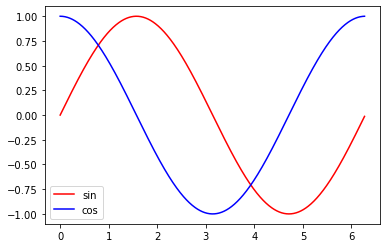

In [26]:
import matplotlib.pyplot as plt
plt.plot(xlst,sinlst,color='r',label='sin')
plt.plot(xlst,coslst,color='b',label='cos')
plt.legend()

### 过滤函数filter

In [30]:
# 过滤序列中的奇数
def is_even(x):
    return x%2 == 0

even_list = []
for i in range(10):
    if is_even(i):
        even_list.append(i)

print(even_list)

[0, 2, 4, 6, 8]


In [31]:
print(list(filter(is_even, range(10))))

[0, 2, 4, 6, 8]


In [32]:
print(list(filter(lambda x: x%2==0, range(10))))

[0, 2, 4, 6, 8]


In [34]:
#不被2整除(奇数)
print(list(filter(lambda x:x%2,range(10))))

[1, 3, 5, 7, 9]


In [35]:
#不被2,3整除
print(list(filter(lambda x:x%2 and x%3,range(10))))

[1, 5, 7]


In [36]:
#同时被2,3整除
print(list(filter(lambda x:x%2==0 and x%3==0,range(10))))

[0, 6]


In [37]:
#滤掉所有的2
list(filter(lambda x:x!=2,[2, 5, 2, 2, 5, 0, 99, 2, 2, 2]))

[5, 5, 0, 99]

### C盘中的系统配置文件

In [39]:
import re
def fimg(fname):
    return re.search(r"\.sys$",fname.lower()) #is not None
print(fimg('abc.sys'))

import os
l=os.listdir("c:\\")
#print(l)

print(list(filter(fimg,l)))

<re.Match object; span=(3, 7), match='.sys'>
['hiberfil.sys', 'pagefile.sys', 'swapfile.sys']


### 规约函数reduce

In [3]:
from functools import reduce

def add_func(x, y):
    print(x, y)
    return x+y

print(reduce(add_func, [1, 2, 3, 4, 5]))

1 2
3 3
6 4
10 5
15


In [2]:
print(reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]))

15


In [4]:
print(reduce(lambda x, y: x+y, range(1,6), 100))

115


In [5]:
print(reduce(lambda x, y: x+y, range(1,6), 100, 50))

TypeError: reduce expected at most 3 arguments, got 4

### 求100~200里面所有的素数

In [26]:
# 定义判断是否为素数的函数

def isPrime(num):
    if num == 1:
        return True
    for i in range(2, num):
        if num%i == 0:
            return False
    else:
        return True

for i in range(100, 200):
    if isPrime(i):
        print(i, end = ",")

101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,

In [ ]:
# 不能被质数整除的数
print(reduce(lambda l,y:not 0 in list(map(lambda x: y%x,l)) and l+[y] or l,range(2,200),[]))

In [27]:
print(list(filter(lambda x: x > 100, reduce(lambda l,y:not 0 in list(map(lambda x: y%x,l)) \
                                            and l+[y] or l,range(2,200),[]))))

[101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]


### 函数编程示例

### 打印出10以内的前三个偶数

In [31]:
i = 1
for number in range(10):
    if i > 3: 
        break
    elif number%2 == 0:
        print(number, end = " ")
        i += 1

0 2 4 

In [30]:
list(filter(lambda number:not number%2, range(10)))[:3]

[0, 2, 4]

### 打印出10以内除了2的偶数

In [29]:
for number in range(10):
    if number%2 != 0 or number == 2: 
        continue
    print(number, end = " ")

0 4 6 8 

In [32]:
list(filter(lambda number: not number%2 and number!=2, range(10)))

[0, 4, 6, 8]

### 打印出2到20内的斐波那契数列 F(1) = 1, F(2) = 1, F(n) = F(n-1) + F(n-2)（n>=2，n∈N*）

In [33]:
list1 = [1, 1]
i = len(list1)
for number in range(2, 20):
    if number == list1[i-1] + list1[i-2]:
        list1.append(number)
        i += 1
print(list1)

[1, 1, 2, 3, 5, 8, 13]


In [34]:
from functools import reduce
reduce(lambda  list1, number: number == list1[-1] + list1[-2] and list1 + [number] or list1, \
       range(2,20), [1,1])

[1, 1, 2, 3, 5, 8, 13]

In [35]:
reduce(lambda  list1, number: list1 + [number] if number == list1[-1] + list1[-2] else list1, \
       range(2,20), [1,1])

[1, 1, 2, 3, 5, 8, 13]

### 利用莱布尼茨公式计算$\pi$
<font size = 5> $\frac{\pi}{4} = 1- \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9}... = \sum_{n=0}^\infty \frac{(-1)^n}{2n+1} $</font>

In [36]:
i = 0
for n in range(10**6):
    i += (-1)**n/(2*n+1)
print(4*i)

3.1415916535897743


In [37]:
i = 0
n = 0
while True:
    i += (-1)**n/(2*n+1)
    n += 1
    if n > 10**6: break
print(4*i)

3.1415936535887745


In [38]:
print(4*reduce(lambda i, n:i+(-1)**n/(2*n+1), range(10**6), 0))

3.1415916535897743
